# BUILDING AND TRAINING THE MODEL USING CHROMAS

#### Importing Relevant Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
g
import os
import librosa
import librosa.display

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.callbacks import ModelCheckpoint

#### Batch Loading of Data

In [25]:
train_data = keras.utils.image_dataset_from_directory(
    directory=r"c:\Users\kanis\Desktop\Data_Vision\new_features\chroma\train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

validation_data = train_data = keras.utils.image_dataset_from_directory(
    directory=r"c:\Users\kanis\Desktop\Data_Vision\new_features\chroma\test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 1621 files belonging to 27 classes.
Found 405 files belonging to 27 classes.


#### Normalising Data

In [26]:
# Normalising Numpy array
def normalise(image,label):
    image = tf.cast(image/255. , tf.float32)
    return image,label

train_data = train_data.map(normalise)
validation_data = validation_data.map(normalise)

#### Building a CNN Model

In [27]:
# Creating CNN model

model = Sequential()

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D((2,2),strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D((2,2),strides=2,padding="valid"))

model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D((2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(27,activation="softmax"))

c:\Users\kanis\Desktop\Data_Vision\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 27)             │         1,755 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,792,379 (14.47 MB)

 Trainable params: 3,792,379 (14.47 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

#### Training the Model

In [31]:
history = model.fit(train_data,epochs=10,validation_data=validation_data, callbacks=[checkpoint])

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.0512 - loss: 3.5985
Epoch 1: val_accuracy improved from -inf to 0.04938, saving model to c:\Users\kanis\Desktop\Data_Vision\models\Chroma_Model.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 94s 5s/step - accuracy: 0.0509 - loss: 3.5870 - val_accuracy: 0.0494 - val_loss: 3.2898
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.0782 - loss: 3.2625
Epoch 2: val_accuracy improved from 0.04938 to 0.05185, saving model to c:\Users\kanis\Desktop\Data_Vision\models\Chroma_Model.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 148s 7s/step - accuracy: 0.0777 - loss: 3.2597 - val_accuracy: 0.0519 - val_loss: 3.1214
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.0639 - loss: 3.0814
Epoch 3: val_accuracy improved from 0.05185 to 0.16049, saving model to c:\Users\kanis\Desktop\Data_Vision\models\Chroma_Model.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 89s 7s/step - accuracy: 0.0652 - loss: 3.0795 - val_accuracy: 0.1605 - val_loss: 2.8883
Epoch 4/1

#### Plotting Accuracy and Loss Graphs during Training and Validation

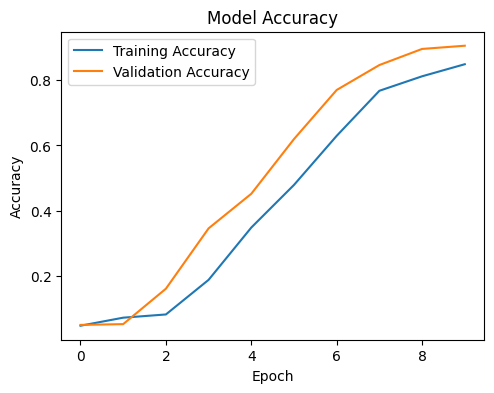

In [32]:
# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

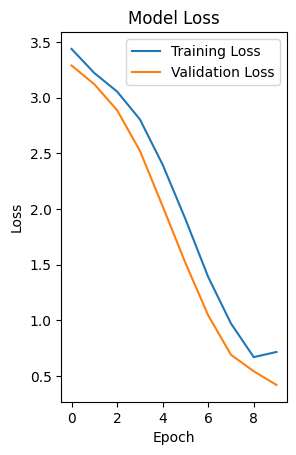

In [33]:
# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')